In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

In [112]:
from google.cloud import bigquery

bq_client = bigquery.Client.from_service_account_json('C:/Users/bharg/Desktop/DATA 225/Group Project 9/crack-will-422608-j1-166ab9162e68.json')

table_id = "crack-will-422608-j1.GroupProject.article"

sql=f"""select date(pub_date) as pub_date,count(Distinct _id) as article_count from `{table_id}` group by date(pub_date) order by 1"""

data = bq_client.query(sql)
rows = []

for row in data.result():
    rows.append(dict(row.items()))

count_by_date = pd.DataFrame(rows)

In [113]:
count_by_date

,pub_date,article_count
0,2022-12-01,174
1,2022-12-02,203
2,2022-12-03,79
3,2022-12-04,69
4,2022-12-05,119
...,...,...
523,2024-05-07,190
524,2024-05-08,174
525,2024-05-09,192
526,2024-05-10,181


In [114]:
import datetime as dt
count_by_date['pub_date'] = pd.to_datetime(count_by_date['pub_date'])
count_by_date['pub_date']=count_by_date['pub_date'].map(dt.datetime.toordinal)

In [115]:
count_by_date

,pub_date,article_count
0,738490,174
1,738491,203
2,738492,79
3,738493,69
4,738494,119
...,...,...
523,739013,190
524,739014,174
525,739015,192
526,739016,181


In [116]:
X = np.array(count_by_date['pub_date'])
Y = np.array(count_by_date['article_count'])
Y = Y.reshape(-1, 1)

In [117]:
linear_model = LinearRegression()
linear_model.fit(X.reshape(-1, 1), Y)

LinearRegression()

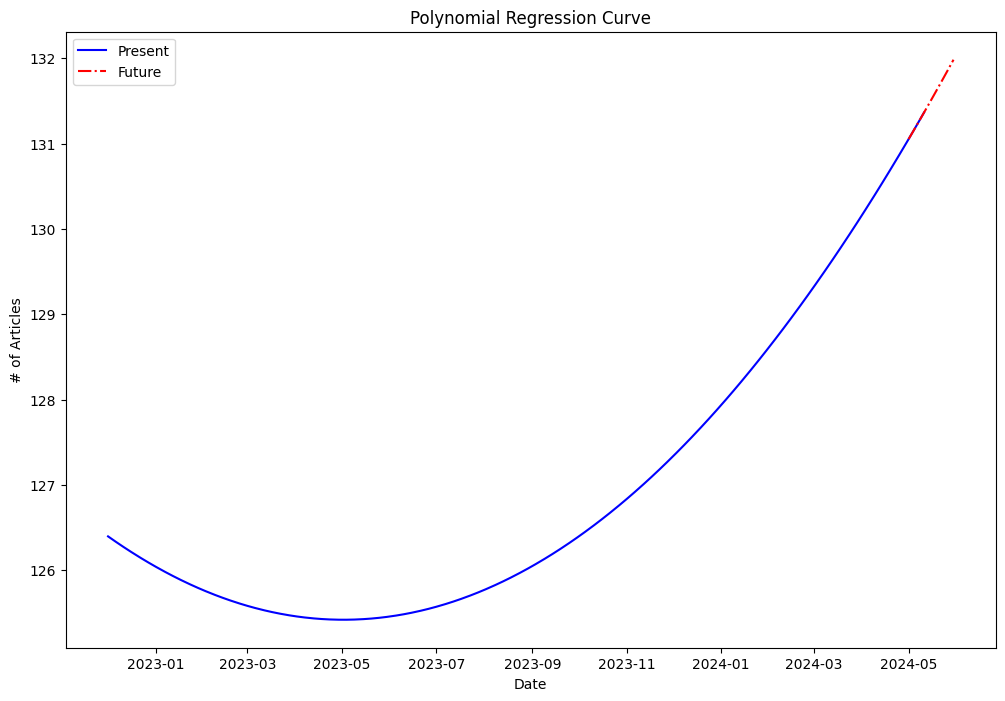

In [139]:
from sklearn.preprocessing import PolynomialFeatures
X_poly = np.array(count_by_date['pub_date']).reshape(-1,1)
Y_poly = np.array(count_by_date['article_count']).reshape(-1, 1)
polynomial = PolynomialFeatures(degree = 2)
X_polynomial = polynomial.fit_transform(X_poly)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_polynomial, Y_poly)

x_values = np.linspace(count_by_date['pub_date'].min(), count_by_date['pub_date'].max(), num=100, dtype = int).reshape(-1, 1)
x_values_poly = polynomial.transform(x_values)
y_predicted = poly_reg_model.predict(x_values_poly)

future_date = pd.date_range(start='2024-05-01', periods=30)
future_df = pd.DataFrame({'Date': future_date})
x_future = pd.to_datetime(future_df['Date'])
x_future = x_future.map(dt.datetime.toordinal)
x_future = np.array(x_future).reshape(-1, 1)
x_future_polynomial = polynomial.fit_transform(x_future)
y_future = poly_reg_model.predict(x_future_polynomial)

plt.figure(figsize=(12,8))
#plt.scatter(count_by_date['pub_date'], count_by_date['article_count'], label='Actual Data Points', color='red')

plt.plot([dt.date.fromordinal(ordinal_date[0]) for ordinal_date in x_values], y_predicted, color='blue', label='Present')
plt.plot([dt.date.fromordinal(ordinal_date[0]) for ordinal_date in x_future], y_future, linestyle = '-.' ,color='red', label='Future')
print('\n')
plt.xlabel('Date')
plt.ylabel('# of Articles')
plt.title('Polynomial Regression Curve')
plt.legend()
plt.show()
plt.close()

In [129]:
future_date = pd.date_range(start='2024-05-01', periods=30)
future_df = pd.DataFrame({'Date': future_date})
x_future = pd.to_datetime(future_df['Date'])
x_future = x_future.map(dt.datetime.toordinal)
x_future = np.array(x_future).reshape(-1, 1)
x_future_polynomial = polynomial.fit_transform(x_future)
y_future = poly_reg_model.predict(x_future_polynomial)

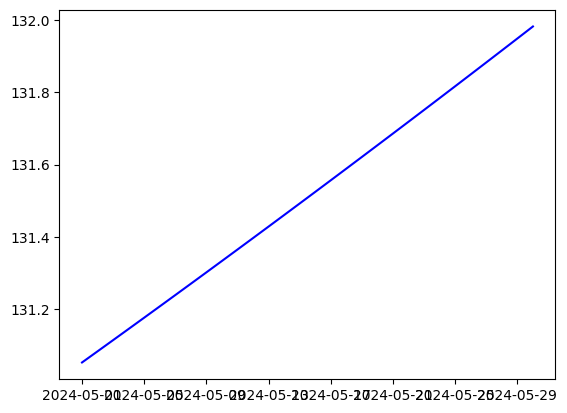

In [135]:

#plt.scatter(count_by_date['pub_date'],count_by_date['article_count'], color = 'red')
plt.plot([dt.date.fromordinal(ordinal_date[0]) for ordinal_date in x_future], y_future, color='blue', label='Polynomial Regression Curve of Degree 2')

In [130]:
y_future

array([[131.05194204],
       [131.08284234],
       [131.11382718],
       [131.14489657],
       [131.17605051],
       [131.20728899],
       [131.23861201],
       [131.27001958],
       [131.3015117 ],
       [131.33308836],
       [131.36474957],
       [131.39649532],
       [131.42832562],
       [131.46024046],
       [131.49223985],
       [131.52432378],
       [131.55649225],
       [131.58874528],
       [131.62108284],
       [131.65350495],
       [131.68601161],
       [131.71860281],
       [131.75127856],
       [131.78403885],
       [131.81688369],
       [131.84981307],
       [131.882827  ],
       [131.91592547],
       [131.94910849],
       [131.98237605]])